<a href="https://colab.research.google.com/github/wilmerod/Notebooks-Curso-Big-Data/blob/main/6_Fuentes_de_datos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fuentes de datos

Los datos que utilizamos en Big Data pueden proceder de distintas fuentes y se suelen encontrar en varios formatos

Los datos pueden ser: numéricos, texto, alfanuméricos, sonidos, imágenes 2D, imágenes 3D, videos, georeferenciados, ... 

Pueden estar almacenados en ficheros locales:

- Texto (txt, csv, json)
- Excel
- Bases de datos (SQL, Access)
- Ficheros de ficheros: Carpetas / Directorios

Pueden estar almacenados en internet:
- Formularios
- Open Data


#Datos en internet

##Indicadores mundiales:
https://databank.worldbank.org/home

##Economía
https://fred.stlouisfed.org/categories/32263

https://www.imf.org/en/Data

##Salud
https://www.who.int/data/gho

##Meteorología
https://www.ncdc.noaa.gov/data-access

##Unión Europea
https://ec.europa.eu/eurostat

##Educación UE
https://data.europa.eu/es/highlights/open-education-data-european-data-portal

##España (INE)
https://www.ine.es/ss/Satellite?L=0&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout

##Canarias (ISTAC)
http://www.gobiernodecanarias.org/istac/datos-abiertos/

#Buscador de datos:
https://www.google.com/publicdata/directory





#Ejemplos para practicar y aprender

https://perso.telecom-paristech.fr/eagan/class/as2013/inf229/labs/datasets

##Política de Transparencia y Open Data

Aunque en primera instancia puedas creer que el Portal de Transparencia y el Portal Open Data (también conocido como Portal de Datos Abiertos) son la misma plataforma, en realidad, no es así.

La diferencia principal entre ambos portales es que en el Portal de Transparencia la información pública está para su consulta y facilitar el acceso por parte de la ciudadanía, mientras que en el Portal de Open Data la información está disponible en diversos formatos (.pdf, .csv, .xls, .doc, …etc) con el principal objetivo y finalidad de que pueda ser reutilizado por parte de la ciudadanía y empresas.

Por lo que es importante que se complementen y que así se facilite el acceso a la información de manera transparente, veraz y actualizada a todos los miembros de la ciudadanía.

#Datos en aplicaciones de internet: las APIs
El término API es una abreviatura de Application Programming Interfaces, que en español significa interfaz de programación de aplicaciones. Se trata de un conjunto de definiciones y protocolos que se utiliza para desarrollar e integrar el software de las aplicaciones, permitiendo la comunicación entre dos aplicaciones de software a través de un conjunto de reglas.

Así pues, podemos hablar de una API como una especificación formal que establece cómo un módulo de un software se comunica o interactúa con otro para cumplir una o muchas funciones. Todo dependiendo de las aplicaciones que las vayan a utilizar, y de los permisos que les dé el propietario de la API a los desarrolladores de terceros.

APIs:

- Twitter
- Idealista

https://rapidapi.com/collection/list-of-free-apis

#Web scrapping

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url='https://www.filmaffinity.com/es/topcat.php?id=new_sa_es'

r=requests.get(url)
html_doc=r.text.encode('raw_unicode_escape') #.decode('utf-8')

pd.set_option('display.max_colwidth', 250)
columns=('Título','Año','Género','Argumento','Valoración','Votos')
index=range(0)
d=pd.DataFrame(index=index, columns=columns)

soup=BeautifulSoup(html_doc,"html.parser")
entradas = soup.find_all('div', {'class': 'mc-right'})

for i, entrada in enumerate(entradas):
    # Con el método "getText()" no nos devuelve el HTML
    titulo1 = entrada.find('a').getText()
    r=titulo1.find('(')
    if r > -1:
        titulo=titulo1[:r-1]
    else:
        titulo=titulo1
    # Sino llamamos al método "getText()" nos devuelve también el HTML
    genero = entrada.find('a', {'class': 'genre'}).getText()
    arg=entrada.find('a', {'class':'synop-text'}).getText()
    rating = entrada.find('div', {'class': 'avg-rating'}).getText()
    votos = entrada.find('div', {'class': 'rat-count'}).getText()
    year=entrada.find('div', {'class': 'mc-data'}).getText()[1:5]
    # Imprimo el Título, Autor y Fecha de las entradas
    #print ("%d- %s (%s): %s" % (i + 1, titulo , genero, rating))
    if 'Animación' not in genero and 'Documental' not in genero and 'Serie de TV' not in genero and year[0:3]=='201':
        d=d.append([{'Título':titulo,'Año':year,'Género': genero,'Argumento':arg,'Valoración':rating,'Votos': votos[1:]}],ignore_index=True)
d

,Título,Año,Género,Argumento,Valoración,Votos
0,Corpus Christi,2019,Drama,"Narra la historia de Daniel, de 20 años de edad, quien experimenta una transformación espiritual mientras vive en un Centro de Detención Juvenil. Quiere ser sacerdote, pero esto es imposible debido a ... [+]","7,2",3.968
1,Entre nosotras,2019,Romance,"Nina y Madeleine, dos mujeres jubiladas, están secretamente enamoradas desde hace décadas. Aunque de cara a los demás no son más que dos vecinas, vienen y van de una casa a la otra compartiendo la ... [+]","6,8",803
2,Solo las bestias,2019,Intriga,"Una mujer desaparece. Después de una tormenta de nieve, su coche es descubierto en una carretera en dirección a un pueblo remoto. Mientras que la policía no sabe por dónde empezar a investigar, cinco ... [+]","6,8",2.063
3,El monstruo de St. Pauli,2019,Thriller,Un despiadado asesino en serie siembra el terror entre los habitantes de la ciudad de Hamburgo a principios de la década de los 70. (FILMAFFINITY),"6,4",2.466
4,Sin olvido,2018,Drama,"Ali Ungar, de 80 años, encuentra un libro de un exoficial de las SS que describe sus actividades en Eslovaquia durante la guerra y se da cuenta de que sus padres fueron ejecutados por él. Saldrá a ... [+]","6,3",146


#Datos geoespaciales: Sistemas de Información Geográfica (GIS)


QGis está creado con Python y es la mejor aplicación de software libre para Sistemas de Información Geográfica

https://www.qgis.org/es/site/

https://www.qgis.org/es/site/about/index.html



##EJEMPLO: Yahoo Finance
https://finance.yahoo.com/quote/MSFT

https://finance.yahoo.com/quote/MSFT/history?p=MSFT

Descargamos los datos de cotización histórica de Microsoft


In [ ]:
import pandas as pd

In [3]:
data = pd.read_csv('sample_data/MSFT.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-11,212.389999,218.039993,212.199997,216.550003,214.581009,29440800
1,2020-11-12,217.210007,219.110001,214.460007,215.440002,213.481110,21593900
2,2020-11-13,216.360001,217.419998,214.160004,216.509995,214.541367,18621100
3,2020-11-16,214.869995,217.740005,214.520004,217.229996,215.254822,24953300
4,2020-11-17,216.100006,217.679993,214.080002,214.460007,212.510025,24154100


Si una columna contiene el campo de fecha, o de fecha y hora, conviene convertir a formato Datetime

In [ ]:
data['Fecha'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Fecha
0,2020-11-11,212.389999,218.039993,212.199997,216.550003,214.581009,29440800,2020-11-11
1,2020-11-12,217.210007,219.110001,214.460007,215.440002,213.481110,21593900,2020-11-12
2,2020-11-13,216.360001,217.419998,214.160004,216.509995,214.541367,18621100,2020-11-13
3,2020-11-16,214.869995,217.740005,214.520004,217.229996,215.254822,24953300,2020-11-16
4,2020-11-17,216.100006,217.679993,214.080002,214.460007,212.510010,24154100,2020-11-17


y podemos usar la columna Fecha como índice

In [ ]:
data=data.set_index('Fecha')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,,
2020-11-11,2020-11-11,212.389999,218.039993,212.199997,216.550003,214.581009,29440800
2020-11-12,2020-11-12,217.210007,219.110001,214.460007,215.440002,213.481110,21593900
2020-11-13,2020-11-13,216.360001,217.419998,214.160004,216.509995,214.541367,18621100
2020-11-16,2020-11-16,214.869995,217.740005,214.520004,217.229996,215.254822,24953300
2020-11-17,2020-11-17,216.100006,217.679993,214.080002,214.460007,212.510010,24154100


Eliminamos las columnas que ya no necesitamos: Date 

In [ ]:
data=data.drop(['Date'], axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
2020-11-11,212.389999,218.039993,212.199997,216.550003,214.581009,29440800
2020-11-12,217.210007,219.110001,214.460007,215.440002,213.481110,21593900
2020-11-13,216.360001,217.419998,214.160004,216.509995,214.541367,18621100
2020-11-16,214.869995,217.740005,214.520004,217.229996,215.254822,24953300
2020-11-17,216.100006,217.679993,214.080002,214.460007,212.510010,24154100


Al tener la Fecha como índice podemos filtrar fácilmente por año, por mes o por día

In [ ]:
data.loc['2021']

,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,216.275391,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,216.484009,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,210.870728,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,216.871475,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,218.192841,22956200
...,...,...,...,...,...,...
2021-11-04,332.890015,336.540009,329.510010,336.440002,336.440002,23992200
2021-11-05,338.510010,338.790009,334.420013,336.059998,336.059998,22564000
2021-11-08,337.299988,337.649994,334.440002,336.989990,336.989990,20897000


In [ ]:
data.loc['2020-12']

,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
2020-12-01,214.509995,217.320007,213.350006,216.210007,214.805008,30904500
2020-12-02,214.880005,215.470001,212.800003,215.369995,213.970459,23724500
2020-12-03,214.610001,216.380005,213.649994,214.240005,212.847809,25120900
2020-12-04,214.220001,215.380005,213.179993,214.360001,212.967026,24666000
2020-12-07,214.369995,215.539993,212.990005,214.289993,212.897461,24620000
2020-12-08,213.970001,216.949997,212.889999,216.009995,214.606293,23284100
2020-12-09,215.160004,215.229996,211.210007,211.800003,210.423660,32440600
2020-12-10,211.770004,213.080002,210.360001,210.520004,209.151978,26733300
2020-12-11,210.050003,213.320007,209.110001,213.259995,211.874161,30979400


In [ ]:
data.loc['2021-11-01']

Open         3.313600e+02
High         3.314900e+02
Low          3.263700e+02
Close        3.293700e+02
Adj Close    3.293700e+02
Volume       2.707320e+07
Name: 2021-11-01 00:00:00, dtype: float64

Podemos representar gráficamente los valores de la tabla

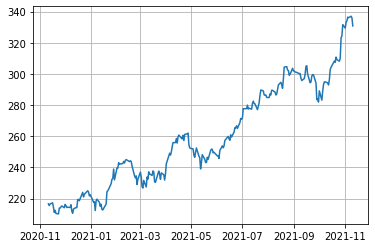

In [ ]:
import matplotlib.pyplot as plt
#fig, ax = plt.figure(), plt.axes()
plt.plot(data['Close'])
plt.grid()

Y podemos enriquecer el gráfico con más información de la tabla

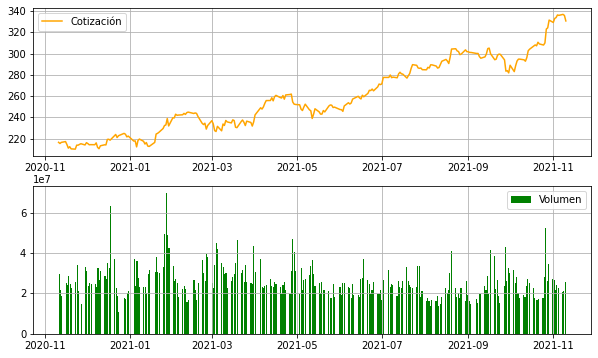

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(data['Close'], label='Cotización', color='orange')
plt.grid()
plt.legend()
plt.subplot(212)
plt.bar(x=data.index,height=data['Volume'], label='Volumen',color='green')
plt.grid()
plt.legend()

##EJERCICIO

Obtener un gráfico con la cotización de APPLE

In [5]:
data = pd.read_csv('sample_data/AAPL.csv')

In [7]:
data['Fecha'] = pd.to_datetime(data['Date'])
data=data.set_index('Fecha')
data=data.drop(['Date'], axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
2020-11-11,117.190002,119.629997,116.440002,119.489998,118.757889,112295000
2020-11-12,119.620003,120.529999,118.570000,119.209999,118.479591,103162300
2020-11-13,119.440002,119.669998,117.870003,119.260002,118.529289,81581900
2020-11-16,118.919998,120.989998,118.150002,120.300003,119.562920,91183000
2020-11-17,119.550003,120.669998,118.959999,119.389999,118.658493,74271000


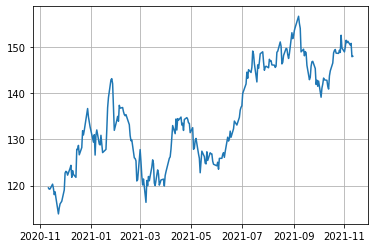

In [8]:
import matplotlib.pyplot as plt
#fig, ax = plt.figure(), plt.axes()
plt.plot(data['Close'])
plt.grid()

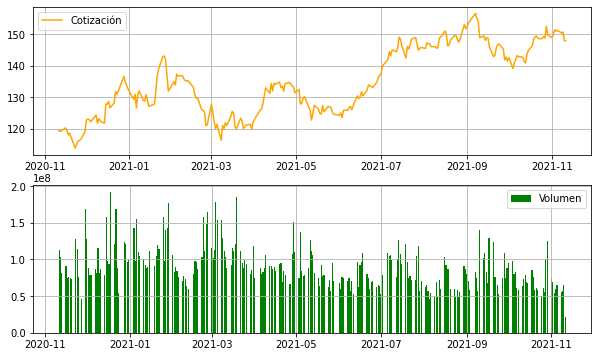

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(data['Close'], label='Cotización', color='orange')
plt.grid()
plt.legend()
plt.subplot(212)
plt.bar(x=data.index,height=data['Volume'], label='Volumen',color='green')
plt.grid()
plt.legend()

#Importar excel con Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

##Caso práctico: Tasa de abandono escolar zonas UE

https://ec.europa.eu/eurostat/databrowser/view/tgs00106/default/table?lang=en

In [ ]:
import pandas as pd
df=pd.read_excel('sample_data/UE_abandono_edu.xlsx',
              sheet_name='Sheet 1', 
              header=9, 
              nrows=123, 
              usecols=(0,1,3,5,7,9,11,13,15,17,19,21,23),
              index_col=0, 
              na_values=":",
              skiprows= lambda x: x in [10, 10])
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
TIME,,,,,,,,,,,,
Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest,15.6,18.4,18.9,20.1,17.7,14.4,15.8,14.8,12.9,10.7,11.8,9.7
Vlaams Gewest,8.6,9.6,9.6,8.7,7.5,7.0,7.2,6.8,7.2,7.3,6.2,6.7
Région wallonne,13.8,13.7,14.7,14.8,14.7,12.9,13.1,10.3,10.5,9.9,10.9,9.8
Severna i yugoiztochna Bulgaria,19.2,17.6,16.8,17.3,16.9,17.5,18.2,18.6,17.4,17.8,19.8,17.4
Yugozapadna i yuzhna tsentralna Bulgaria,10.1,8.5,7.6,8.2,8.5,8.5,9.3,9.8,8.7,8.3,9.1,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...
Bati Karadeniz,47.4,45.2,42.0,38.7,37.2,36.8,31.5,29.6,28.1,27.1,24.8,21.1
Dogu Karadeniz,37.5,36.8,33.9,32.3,28.1,29.5,26.0,23.5,21.6,19.8,18.8,20.6
Kuzeydogu Anadolu,59.4,58.1,54.2,49.2,51.8,54.8,49.6,42.7,40.0,40.2,40.1,33.5


In [ ]:
Tasa_Abandono_Canarias = df.loc['Canarias']
Tasa_Abandono_Madrid = df.loc['Comunidad de Madrid']

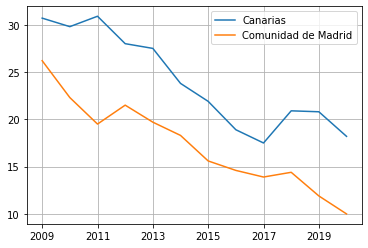

In [ ]:
Tasa_Abandono_Canarias.plot(grid=True, legend=True)
Tasa_Abandono_Madrid.plot(grid=True, legend=True)

##Caso práctico: Esperanza de vida por país


Esperanza de vida por país

https://data.worldbank.org/indicator/SP.DYN.LE00.IN

Hombres

https://datos.bancomundial.org/indicador/SP.DYN.LE00.MA.IN

Mujeres

https://datos.bancomundial.org/indicator/SP.DYN.LE00.FE.IN

https://datos.bancomundial.org/indicador/SP.DYN.LE00.IN?end=2019&start=1960


In [ ]:
import pandas as pd
data_ev_total=pd.read_excel("sample_data/EV Total.xls")
data_ev_total.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-10-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.00000,1963.000000,1964.000000,1965.000000,1966.000000,1967.000000,1968.000000,1969.000000,1970.000000,1971.000000,1972.000000,1973.000000,1974.000000,1975.000000,1976.000000,1977.00000,1978.000000,1979.000000,1980.000000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.00000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0
3,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.44400,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.44100,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.28700,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
4,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.60399,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.09785,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.96655,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN


In [ ]:
data_ev_total=pd.read_excel("sample_data/EV Total.xls", header=3)
data_ev_total.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN


In [ ]:
data_ev_total=pd.read_excel("sample_data/EV Total.xls", header=3, index_col=0)
data_ev_total.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN
Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN
Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN


In [ ]:
data_ev_total=data_ev_total.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_ev_total.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
Africa Eastern and Southern,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN
Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
Africa Western and Central,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN
Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN


In [ ]:
EV_Spain = data_ev_total.loc['Spain']

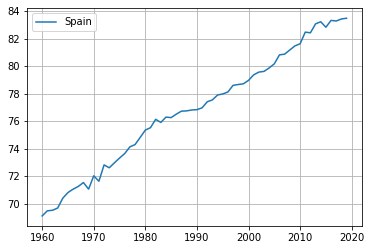

In [ ]:
EV_Spain.plot(grid=True, legend=True)

In [ ]:
data_ev_hombres=pd.read_excel("sample_data/EV Hombres.xls", header=3, index_col=0).drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_ev_hombres.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,64.084000,64.429000,64.747000,65.053000,65.356000,65.660000,65.959000,66.242000,66.503000,66.745000,66.972000,67.190000,67.405000,67.626000,67.857000,68.110000,68.394000,68.706000,69.041000,69.387000,69.726000,70.036000,70.301000,70.510000,70.660000,70.757000,70.814000,70.851000,70.886000,70.92400,70.969000,71.018000,71.062000,71.098000,71.126000,71.148000,71.168000,71.190000,71.21900,71.259000,71.312000,71.382000,71.469000,71.572000,71.688000,71.816000,71.952000,72.093000,72.235000,72.377000,72.517000,72.654000,72.792000,72.930000,73.069000,73.208000,73.348000,73.488000,73.628000,73.768000,NaN
Africa Eastern and Southern,41.177958,41.618931,42.049027,42.466545,42.871793,43.266739,43.654421,44.038221,44.419943,44.799825,45.177791,45.553415,45.923616,46.284196,46.631350,46.961268,47.270358,47.558268,47.827375,48.079628,48.325630,48.562472,48.794033,49.019048,49.228145,49.400122,49.511586,49.545128,49.498521,49.38484,49.232318,49.078128,48.946969,48.849650,48.782420,48.742579,48.739396,48.786889,48.89816,49.085130,49.362461,49.738602,50.218466,50.798301,51.469376,52.221712,53.045624,53.918499,54.814221,55.709654,56.580680,57.408893,58.187327,58.907374,59.560016,60.139422,60.643170,61.083445,61.470354,61.813155,NaN
Afghanistan,31.718000,32.224000,32.724000,33.216000,33.700000,34.180000,34.656000,35.133000,35.615000,36.106000,36.607000,37.120000,37.644000,38.180000,38.729000,39.293000,39.874000,40.473000,41.090000,41.723000,42.372000,43.037000,43.715000,44.403000,45.097000,45.796000,46.499000,47.204000,47.906000,48.60100,49.281000,49.938000,50.570000,51.172000,51.746000,52.287000,52.798000,53.285000,53.75300,54.210000,54.663000,55.119000,55.583000,56.056000,56.542000,57.044000,57.562000,58.092000,58.626000,59.159000,59.683000,60.190000,60.675000,61.133000,61.563000,61.965000,62.343000,62.701000,63.047000,63.382000,NaN
Africa Western and Central,36.043028,36.469825,36.890425,37.302945,37.706825,38.104684,38.498920,38.894711,39.298083,39.712956,40.145207,40.598077,41.071046,41.560124,42.061021,42.571579,43.088239,43.605507,44.114684,44.608420,45.075568,45.506829,45.897046,46.243419,46.541942,46.792925,46.999823,47.170747,47.314688,47.43725,47.538307,47.613029,47.661627,47.688495,47.702253,47.714111,47.734488,47.777517,47.85736,47.986841,48.184036,48.464959,48.828700,49.268452,49.775683,50.333830,50.921715,51.517066,52.099387,52.655469,53.179092,53.673440,54.149592,54.614796,55.067740,55.505205,55.921324,56.311912,56.674964,57.012163,NaN
Angola,36.305000,36.582000,36.874000,37.181000,37.501000,37.833000,38.177000,38.532000,38.894000,39.260000,39.627000,39.994000,40.359000,40.716000,41.063000,41.394000,41.703000,41.990000,42.254000,42.492000,42.708000,42.906000,43.090000,43.259000,43.414000,43.544000,43.640000,43.696000,43.711000,43.69200,43.642000,43.568000,43.487000,43.416000,43.374000,43.378000,43.442000,43.574000,43.78100,44.074000,44.466000,44.966000,45.567000,46.261000,47.038000,47.893000,48.821000,49.807000,50.826000,51.850000,52.848000,53.790000,54.660000,55.447000,56.140000,56.737000,57.242000,57.677000,58.064000,58.416000,NaN


In [ ]:
EV_Spain_hombres = data_ev_hombres.loc['Spain']

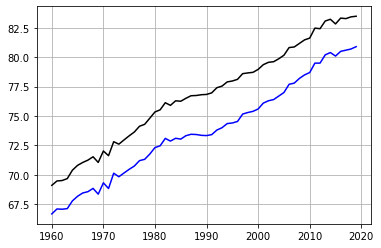

In [ ]:
EV_Spain.plot(grid=True, color='black')
EV_Spain_hombres.plot(grid=True, color='blue')

In [ ]:
data_ev_mujeres=pd.read_excel("sample_data/EV Mujeres.xls", header=3, index_col=0).drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_ev_mujeres.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,67.129000,67.62500,68.065000,68.458000,68.817000,69.165000,69.526000,69.917000,70.345000,70.811000,71.306000,71.815000,72.313000,72.779000,73.204000,73.579000,73.902000,74.183000,74.430000,74.647000,74.839000,75.010000,75.164000,75.305000,75.436000,75.556000,75.663000,75.754000,75.827000,75.886000,75.932000,75.969000,76.002000,76.033000,76.066000,76.100000,76.133000,76.164000,76.192000,76.221000,76.257000,76.307000,76.375000,76.465000,76.575000,76.703000,76.845000,76.992000,77.140000,77.285000,77.425000,77.561000,77.695000,77.830000,77.965000,78.101000,78.237000,78.372000,78.507000,78.641000,NaN
Africa Eastern and Southern,44.300571,44.76118,45.205585,45.631162,46.039221,46.432448,46.815706,47.194808,47.572043,47.948553,48.323527,48.696131,49.062568,49.418857,49.762285,50.088664,50.394150,50.679135,50.946587,51.200735,51.456069,51.710481,51.974630,52.245172,52.514566,52.765874,52.971879,53.116147,53.189060,53.198964,53.166098,53.118428,53.076758,53.048248,53.024891,53.001545,52.980451,52.979222,53.017289,53.114287,53.291143,53.564031,53.944809,54.438284,55.041854,55.754853,56.573307,57.475167,58.428816,59.407258,60.377210,61.312940,62.196971,63.011159,63.744788,64.388257,64.939294,65.415515,65.832944,66.202116,NaN
Afghanistan,33.314000,33.84000,34.359000,34.866000,35.364000,35.853000,36.338000,36.823000,37.314000,37.815000,38.327000,38.851000,39.385000,39.931000,40.490000,41.064000,41.656000,42.265000,42.894000,43.541000,44.209000,44.899000,45.607000,46.331000,47.066000,47.807000,48.550000,49.290000,50.023000,50.742000,51.442000,52.119000,52.774000,53.405000,54.012000,54.592000,55.141000,55.663000,56.162000,56.645000,57.120000,57.596000,58.080000,58.578000,59.093000,59.628000,60.183000,60.751000,61.326000,61.898000,62.459000,63.000000,63.514000,63.999000,64.453000,64.877000,65.275000,65.656000,66.026000,66.388000,NaN
Africa Western and Central,38.427232,38.85218,39.269477,39.677684,40.077240,40.473643,40.873868,41.285136,41.713774,42.162546,42.632448,43.123953,43.630460,44.146242,44.665440,45.185652,45.706999,46.226228,46.737461,47.233958,47.704211,48.137463,48.528216,48.871814,49.165667,49.410608,49.612359,49.779644,49.920675,50.040823,50.135493,50.197495,50.223619,50.216482,50.185612,50.141817,50.098640,50.072992,50.083264,50.145489,50.281140,50.507416,50.824880,51.226736,51.705118,52.244127,52.822694,53.417515,54.005894,54.574536,55.116185,55.632942,56.135922,56.631601,57.116899,57.587683,58.037107,58.461946,58.859239,59.231072,NaN
Angola,38.763000,39.06900,39.391000,39.727000,40.075000,40.433000,40.801000,41.175000,41.554000,41.934000,42.314000,42.693000,43.073000,43.449000,43.820000,44.181000,44.531000,44.866000,45.183000,45.480000,45.754000,46.005000,46.231000,46.434000,46.612000,46.762000,46.878000,46.962000,47.017000,47.052000,47.070000,47.077000,47.082000,47.101000,47.149000,47.242000,47.391000,47.605000,47.893000,48.265000,48.736000,49.317000,50.005000,50.789000,51.661000,52.614000,53.642000,54.726000,55.839000,56.953000,58.033000,59.052000,59.992000,60.841000,61.591000,62.237000,62.783000,63.252000,63.666000,64.039000,NaN


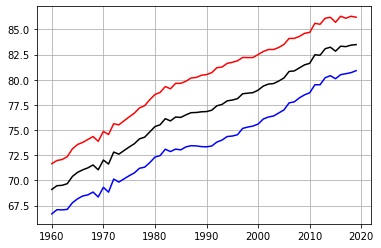

In [ ]:
EV_Spain_mujeres = data_ev_mujeres.loc['Spain']
EV_Spain.plot(grid=True, color='black')
EV_Spain_hombres.plot(grid=True, color='blue')
EV_Spain_mujeres.plot(grid=True, color='red')

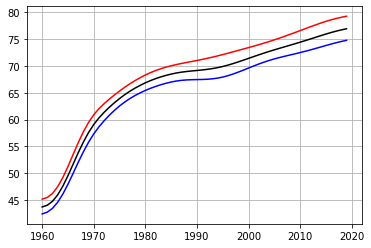

In [ ]:
EV_China = data_ev_total.loc['China']
EV_China_hombres = data_ev_hombres.loc['China']
EV_China_mujeres = data_ev_mujeres.loc['China']
EV_China.plot(grid=True, color='black')
EV_China_hombres.plot(grid=True, color='blue')
EV_China_mujeres.plot(grid=True, color='red')

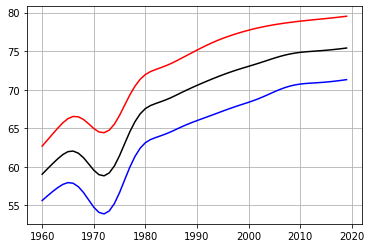

In [ ]:
#Efecto de la guerra I
EV = data_ev_total.loc['Vietnam']
EV_hombres = data_ev_hombres.loc['Vietnam']
EV_mujeres = data_ev_mujeres.loc['Vietnam']
EV.plot(grid=True, color='black')
EV_hombres.plot(grid=True, color='blue')
EV_mujeres.plot(grid=True, color='red')

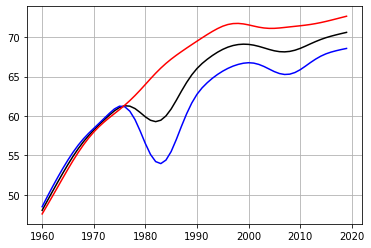

In [ ]:
#Efecto de las guerras II
EV = data_ev_total.loc['Iraq']
EV_hombres = data_ev_hombres.loc['Iraq']
EV_mujeres = data_ev_mujeres.loc['Iraq']
EV.plot(grid=True, color='black')
EV_hombres.plot(grid=True, color='blue')
EV_mujeres.plot(grid=True, color='red')

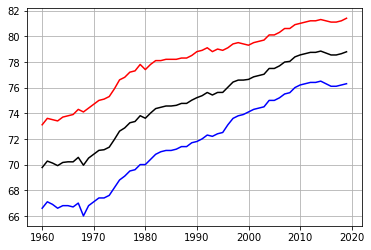

In [ ]:
#Efecto de la droga
EV = data_ev_total.loc['United States']
EV_hombres = data_ev_hombres.loc['United States']
EV_mujeres = data_ev_mujeres.loc['United States']
EV.plot(grid=True, color='black')
EV_hombres.plot(grid=True, color='blue')
EV_mujeres.plot(grid=True, color='red')